In [1]:
import random
import string
import RNA
import numpy as np
import pandas as pd
import os
import sys
import subprocess
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.despine()

<Figure size 432x288 with 0 Axes>

# mfe findpath

In [2]:
# examples

sys.path.append('../src')
import subopt_mfe

# examples: lower barrier, can't be merged otherwise
# sequence = "GGACCUCAGGGUAUCCGGGCCUGUAAUCACGGCUAGUGCAAUGCGGGUGUUUCGAGGGCCAGGGCUUGUUCGUUGGUCUGGUCGCCAGAGUUUGUAGAAG"
# s1 = "((((.((..(((...((((((((((.((((.....))).).)))))))...)))..(((((((.(.........).)))))))))).))))))......."
# s2 = "....(((..(((..(((((((...(((...((((...((....(((.....)))...))...)))).)))....)))))))..))).))).........."
# sequence = "ACUCCCUUCGCGGAUCGCUAGCGUGUUUCUAUUAUCAGUACUACGAUUGUUGUGCUUGCCUAACACCUGACGCUGAGGACGAUCCUUACCGCAGGUCUGU"
# s1 = "....(((.((.(((((((((((((...........((((((.((....)).)))).))...........)))))).)..))))))....)).)))....."
# s2 = ".........((((((.......(((((.........(((((.((....)).))))).....)))))(((.((.((((((...)))))).)))))))))))"

#----

# interior loop merged
sequence = "UCGAAAGCCCGUUUCUUUCUUACACCGCCAGUGCCUAAAUGGUUCAAUGUCAACGCGUGUACAGGAGAUCCAAAGCUCGCGCAGUGCCUUUAUGAUAUAC"
s1 = ".((..(((.......(((((((((.(((((..(((.....)))....)).....)))))))..)))))......)))..))..(((...........)))"
s2 = ".((..(((.....(((((..((((.(((....(((.....)))...........)))))))..)))))......)))..))..................."

# example from presentation - needs suboptimal inputs 
# sequence = "UGAAGACCCAUUGAGUAACGACACCGCACGGCGCAUGGCGUCAGAGUAGCACUGCCUCGU"
# s1 =       "....(((((((.(.(...((....)).....).))))).)))((.((......))))..."
# s2 =       "....(((((((...((..((........))..)))))).))).(((..((...))))).."

subopt_mfe.direct_vs_indirect(sequence, s1, s2, Verbose=True)

UCGAAAGCCCGUUUCUUUCUUACACCGCCAGUGCCUAAAUGGUUCAAUGUCAACGCGUGUACAGGAGAUCCAAAGCUCGCGCAGUGCCUUUAUGAUAUAC
.((..(((.......(((((((((.(((((..(((.....)))....)).....)))))))..)))))......)))..))..(((...........))) [   0,    0 ] -10.60
.((..(((.......(((((((((.(((((..(((.....)))....)).....)))))))..)))))......)))..))..((.............)) [ -86,  -98 ]  -9.60
.((..(((.......(((((((((.(((((..(((.....)))....)).....)))))))..)))))......)))..))..(...............) [ -85,  -99 ]  -8.10
.((..(((.......(((((((((.(((((..(((.....)))....)).....)))))))..)))))......)))..))................... [ -84, -100 ] -13.70
.((..(((.......((((.((((.(((((..(((.....)))....)).....)))))))...))))......)))..))................... [ -20,  -64 ] -12.40
.((..(((........(((.((((.(((((..(((.....)))....)).....)))))))...))).......)))..))................... [ -16,  -68 ] -11.00
.((..(((.........((.((((.(((((..(((.....)))....)).....)))))))...))........)))..))................... [ -17,  -67 ] -10.20
.((..(((..........(.((((.(((((..(((.....)))..

(-8.1, -8.1, 0, 15, 0.13333333333333333, True)

# Split Result (only 2 sections with MFE method)

500

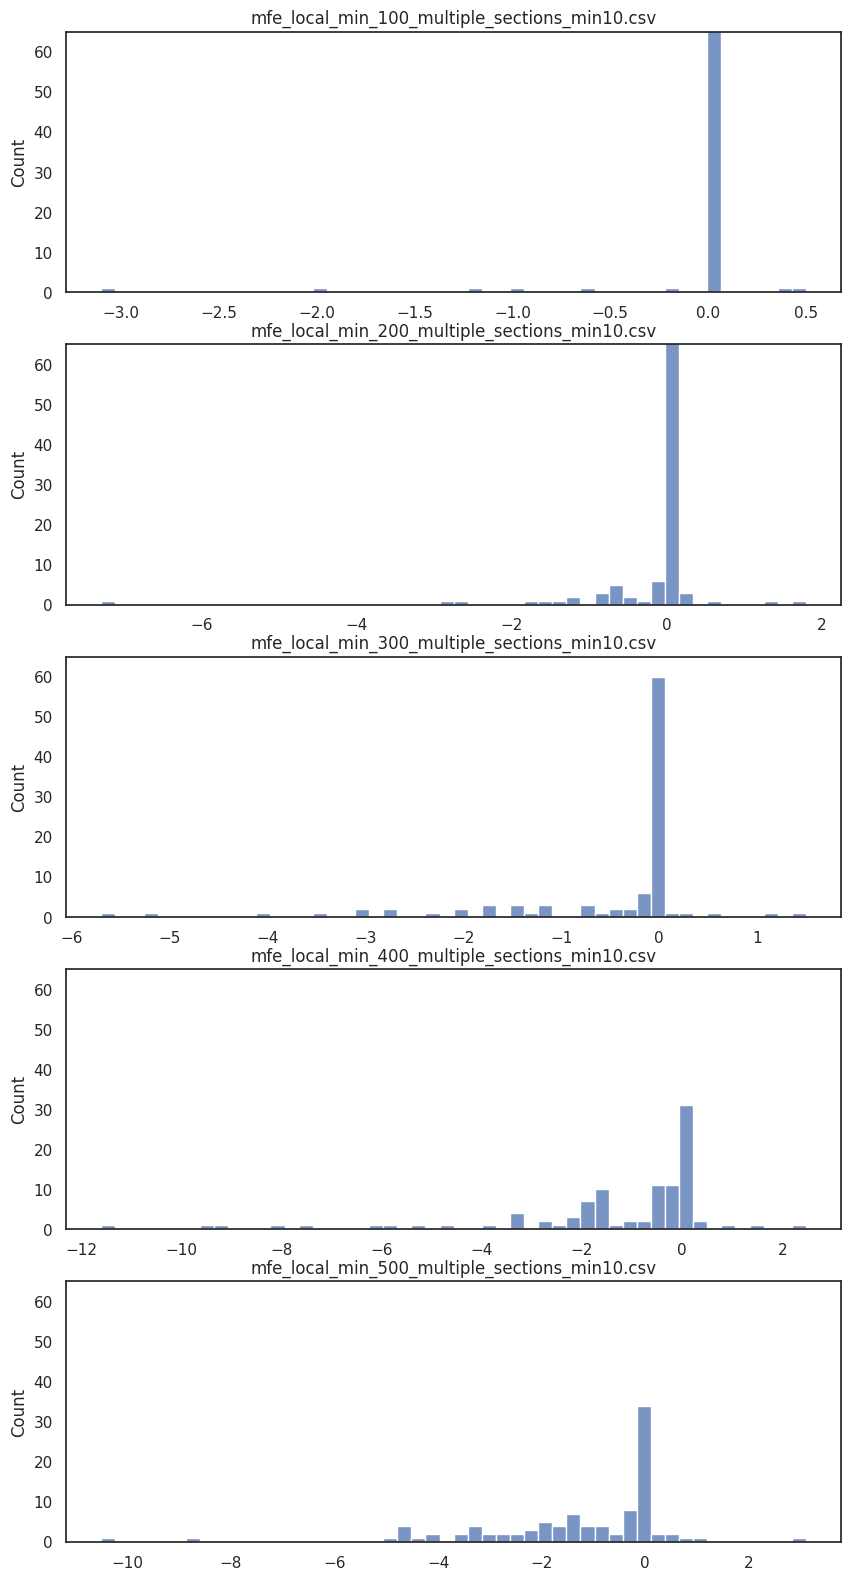

In [3]:
# barrier shift
prefix = ""
filenames = ["mfe_local_min_100_multiple_sections_min10.csv",
             "mfe_local_min_200_multiple_sections_min10.csv",
             "mfe_local_min_300_multiple_sections_min10.csv",
             "mfe_local_min_400_multiple_sections_min10.csv",
             "mfe_local_min_500_multiple_sections_min10.csv",
             ]

subplots = len(filenames)
fig, axes=plt.subplots(subplots,1, figsize=(10,20), dpi=100)

df = pd.DataFrame()

for i, filename in enumerate(filenames):
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    df = pd.concat(frames)    
    target_axis = i    
    barrier_energy_change = c_df["mfe_results"] - c_df["py_results"]
    
    axes[target_axis].set(title=filename, ylim=(0, 65)) # xlabel="barrier energy shift in kcal/mol", 
    sns.histplot(barrier_energy_change, bins=50, ax=axes[target_axis])    

df["mfe_found"].count()

<AxesSubplot:title={'center':'basepair distance ratio (50/50 split is ideal)'}, xlabel='seq_length', ylabel='bp_dist_ratio'>

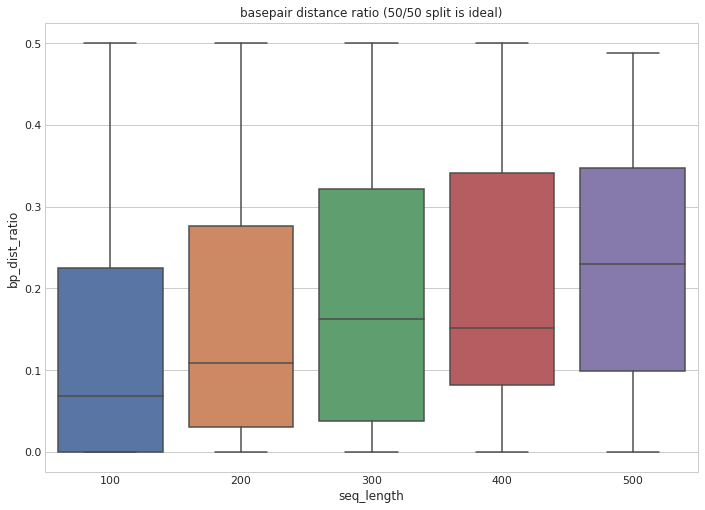

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('seaborn-whitegrid')
plt.title("basepair distance ratio (50/50 split is ideal)")
sns.boxplot(x="seq_length", y="bp_dist_ratio", data=df)


# Merge Findpath with exterior loops + interior loops

In [7]:
import ext_loops

sequence = "CUCCGUUCGGCACAGUGGGAUUCAGACUUCCUGCCGCUGGGAGAAACGCGCGGUUCGGGGUGUAAUCAUGGUUUAAGCCUCCGAAGCCCA"
s1 =       "((((...((((...((((((........)))))).))))))))........((((((((((..(((....)))...))).))))).)).."
s2 =       "((((...(((((.....(((........))))))))...))))........(((((((((..(.(........).)..))))).)))).."

# Debug = True
Debug = False

loops = ext_loops.new_exterior_loops(sequence, s1, s2, inline_int_loops=False)
print(loops)
en_merge, en = ext_loops.findpath_split(sequence, s1, s2, loops, 2, findpath_Verbose=True)
print (en_merge, en)


[(1, 43), (44, 88)]

((((...((((...((((((........)))))).))))))))........((((((((((..(((....)))...))).))))).)).. -27.40 {  0 /   0}
((((...((((...((((((........)))))).))))))))........((.(((((((..(((....)))...))).))))..)).. -25.10 {-54 / -85}
((((...((((...((((((........)))))).))))))))........((((((((((..(((....)))...))).)))).))).. -27.40 { 54 /  86}
((((...((((...((((((........)))))).))))))))........(((.((((((..(((....)))...))).)))..))).. -25.20 {-55 / -84}
((((...((((...((((((........)))))).))))))))........((((((((((..(((....)))...))).))).)))).. -27.40 { 55 /  85}
((((...((((...((((((........)))))).))))))))........((((((((((..((......))...))).))).)))).. -26.10 {-66 / -71}
((((...((((...((((((........)))))).))))))))........((((((((((..(........)...))).))).)))).. -25.50 {-65 / -72}
((((...((((...((((((........)))))).))))))))........((((((((((...............))).))).)))).. -27.10 {-64 / -73}
((((....(((...((((((........)))))).))).))))........((((((((((...............))).))).)))).. -24.40 {

# Runtimes
## Merging Findpath with and without exterior loops

<AxesSubplot:xlabel='sequence_length', ylabel='runtime'>

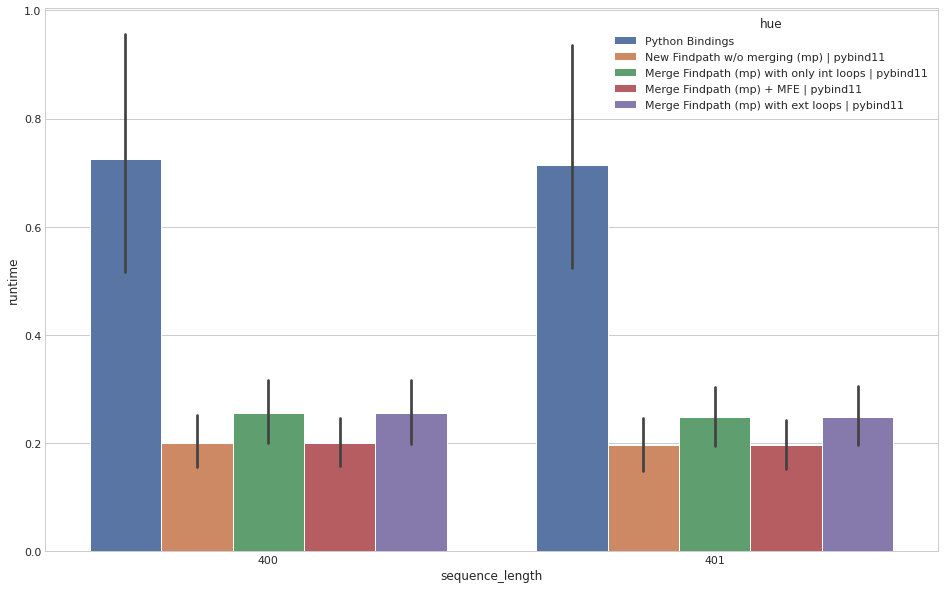

In [34]:
# barrier shift
prefix = "./results/"
filenames = [
            "h_local_min_400_multiple_sections_min10.csv",
            #  "h_local_min_400_multiple_sections_min10.csv",
            #  "b_local_min_400_multiple_sections_min10.csv",
            #  "4_local_min_400_multiple_sections_min10.csv",
             ]

subplots = len(filenames)

df = pd.DataFrame()

for i, filename in enumerate(filenames):
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])
    c_df["runtime"] = c_df["py_runtimes"]
    c_df["hue"] = "Python Bindings"    
    df = pd.concat(frames)    

    # c_df = pd.read_csv(prefix+filename)
    # frames = [df, c_df]
    # c_df["sequence_length"] = len(c_df["sequence"][0])
    # c_df["runtime"] = c_df["new_fp_runtimes"]
    # c_df["hue"] = "New Findpath w/o merging (single thread) | pybind11" 
    # df = pd.concat(frames)    
    
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])
    c_df["runtime"] = c_df["new_fp_runtimes"]
    c_df["hue"] = "New Findpath w/o merging (mp) | pybind11" 
    df = pd.concat(frames)    
    
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])
    c_df["runtime"] = c_df["new_merge_runtimes"]
    c_df["hue"] = "Merge Findpath (mp) with only int loops | pybind11" 
    df = pd.concat(frames)    
    
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])
    c_df["runtime"] = c_df["new_merge_mfe_runtimes"]
    c_df["hue"] = "Merge Findpath (mp) + MFE | pybind11" 
    df = pd.concat(frames)    
    
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])
    c_df["runtime"] = c_df["new_merge_ext_runtimes"]
    c_df["hue"] = "Merge Findpath (mp) with ext loops | pybind11"    
    df = pd.concat(frames)   
    
    

filenames = [
             "h4_local_min_400_multiple_sections_min10.csv",
            #  "local_min_300_multiple_sections_min10.csv",
            #  "local_min_400_multiple_sections_min10.csv",
             ]

for i, filename in enumerate(filenames):
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])+1
    c_df["runtime"] = c_df["py_runtimes"]
    c_df["hue"] = "Python Bindings"    
    df = pd.concat(frames)    

    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])+1
    c_df["runtime"] = c_df["new_fp_runtimes"]
    c_df["hue"] = "New Findpath w/o merging (mp) | pybind11" 
    df = pd.concat(frames)    
       
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])+1
    c_df["runtime"] = c_df["new_merge_runtimes"]
    c_df["hue"] = "Merge Findpath (mp) with only int loops | pybind11" 
    df = pd.concat(frames)    
    
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])+1
    c_df["runtime"] = c_df["new_merge_mfe_runtimes"]
    c_df["hue"] = "Merge Findpath (mp) + MFE | pybind11" 
    df = pd.concat(frames)    
    
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])+1
    c_df["runtime"] = c_df["new_merge_ext_runtimes"]
    c_df["hue"] = "Merge Findpath (mp) with ext loops | pybind11"    
    df = pd.concat(frames)   

# df
sns.set(rc={'figure.figsize':(16,10)})
plt.style.use('seaborn-whitegrid')
sns.barplot(y="runtime", x="sequence_length", hue="hue", data=df)

# MFE barrier shift

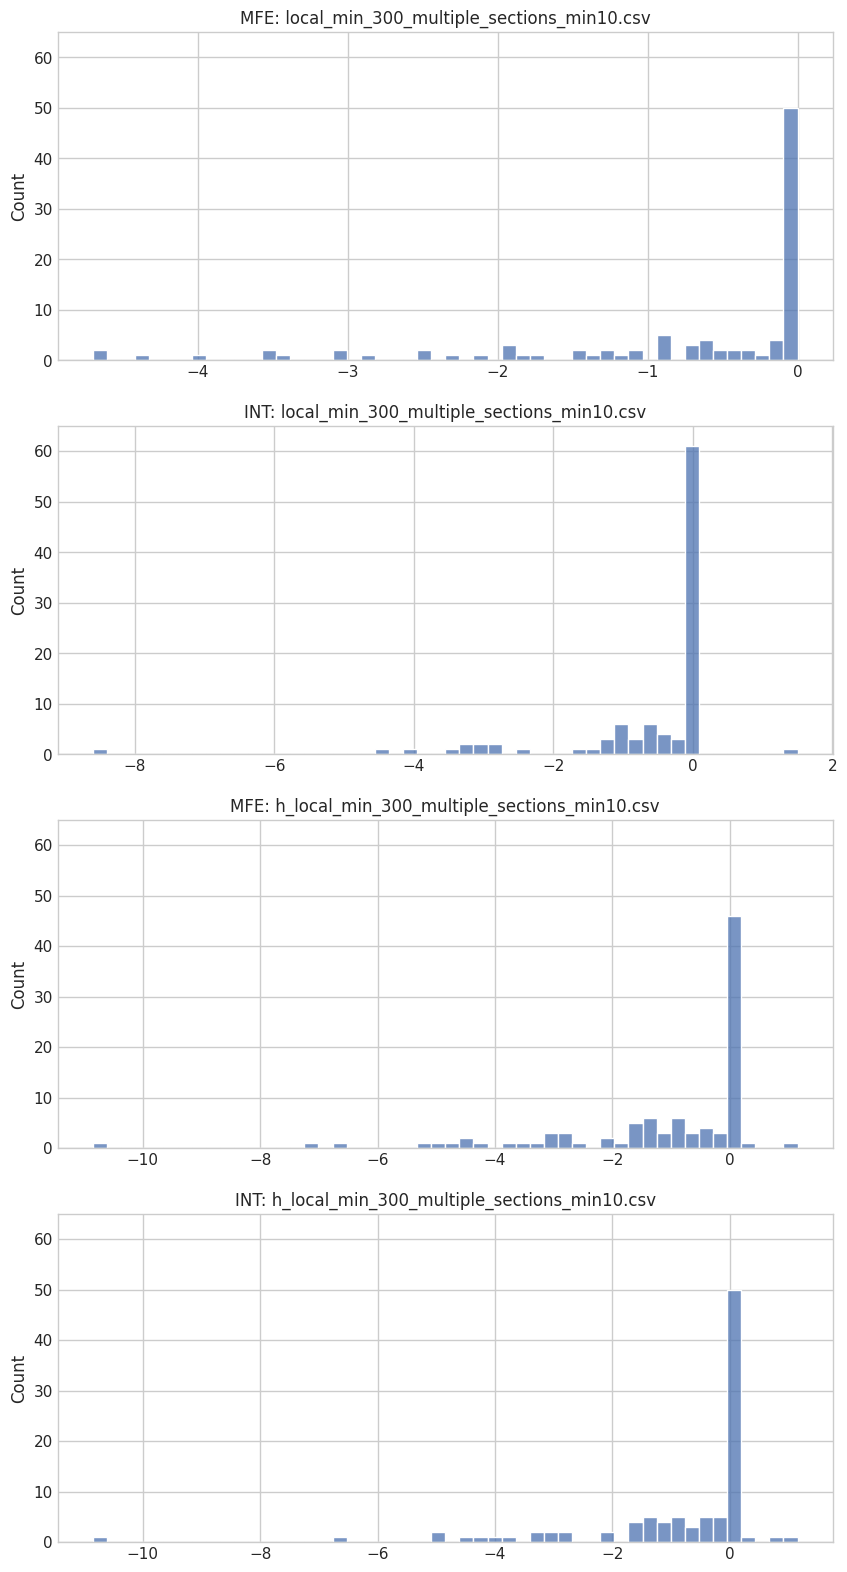

In [7]:
# barrier shift


filenames = ["local_min_300_multiple_sections_min10.csv",
             "h_local_min_300_multiple_sections_min10.csv"]

subplots = len(filenames)*2
fig, axes=plt.subplots(subplots,1, figsize=(10,20), dpi=100)

df = pd.DataFrame()

for i, filename in enumerate(filenames):
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])    
    df = pd.concat(frames)    
    
    target_axis = i*2       
    barrier_energy_change = c_df["new_merge_mfe_results"] - c_df["py_results"]        
    axes[target_axis].set(title="MFE: "+filename, ylim=(0, 65)) # xlabel="barrier energy shift in kcal/mol", 
    sns.histplot(barrier_energy_change, bins=50, ax=axes[target_axis])        
    
    target_axis = i*2+1
    barrier_energy_change = c_df["new_merge_results"] - c_df["py_results"]      
    axes[target_axis].set(title="INT: "+filename, ylim=(0, 65)) # xlabel="barrier energy shift in kcal/mol", 
    sns.histplot(barrier_energy_change, bins=50, ax=axes[target_axis])    

## Barrier Shift Ext & Int loops variation

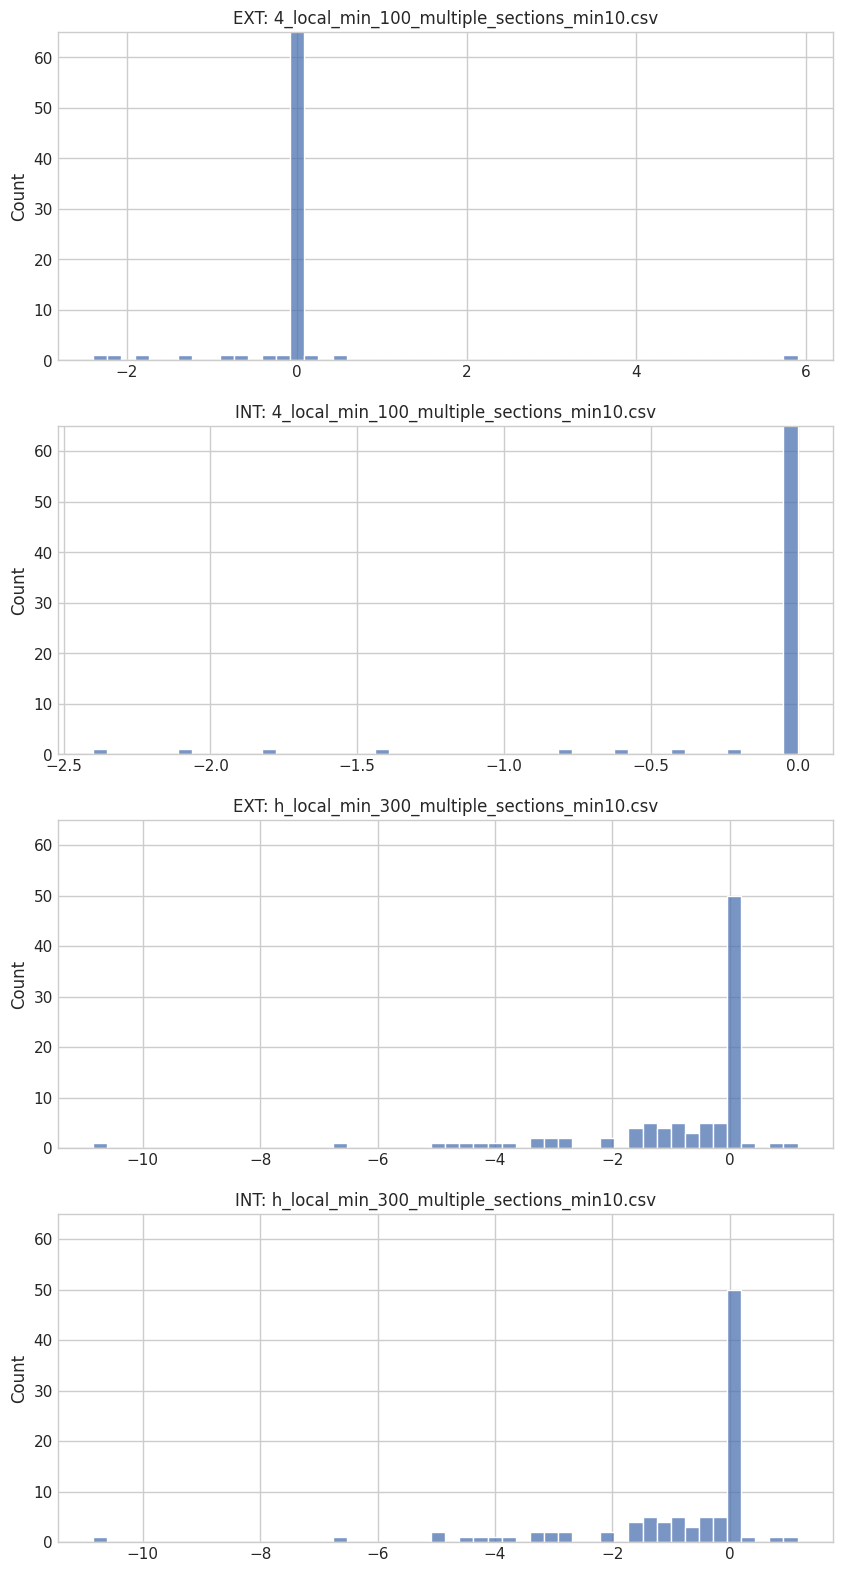

In [9]:
# barrier shift


filenames = ["4_local_min_100_multiple_sections_min10.csv",
             "h_local_min_300_multiple_sections_min10.csv"]

subplots = len(filenames)*2
fig, axes=plt.subplots(subplots,1, figsize=(10,20), dpi=100)

df = pd.DataFrame()

for i, filename in enumerate(filenames):
    c_df = pd.read_csv(prefix+filename)
    frames = [df, c_df]
    c_df["sequence_length"] = len(c_df["sequence"][0])    
    df = pd.concat(frames)    
    
    target_axis = i*2       
    barrier_energy_change = c_df["new_merge_ext_results"] - c_df["py_results"]        
    axes[target_axis].set(title="EXT: "+filename, ylim=(0, 65)) # xlabel="barrier energy shift in kcal/mol", 
    sns.histplot(barrier_energy_change, bins=50, ax=axes[target_axis])        
    
    target_axis = i*2+1
    barrier_energy_change = c_df["new_merge_results"] - c_df["py_results"]      
    axes[target_axis].set(title="INT: "+filename, ylim=(0, 65)) # xlabel="barrier energy shift in kcal/mol", 
    sns.histplot(barrier_energy_change, bins=50, ax=axes[target_axis])    


In [10]:
# instances where exterior loops perform worse than int loops version
df[df["new_merge_ext_results"] > df["new_merge_results"]]

,Unnamed: 0,i,sequence,s1,s2,search_width_multiplier,bp_dist,new_fp_mp_runtimes,new_fp_mp_results,new_fp_runtimes,new_fp_results,cpp_orig_runtimes,cpp_orig_results,py_runtimes,py_results,new_merge_runtimes,new_merge_results,new_merge_ext_runtimes,new_merge_ext_results,sequence_length
4,4,4,GUUGGUAUGAAGAAAUUUGCUGGGAGAAAAAGUCUAAGGCCUUGAA...,((.(((((.((((..(((((((.((....(((.(....).)))......,((.((((.......((((((((((...((..(((...))).))......,2,41,0.0188,4.20,0.0297,4.20,0.1314,4.20,0.0319,4.20,0.0143,4.20,0.0191,4.70,100
8,8,8,UCGAAAGCCCGUUUCUUUCUUACACCGCCAGUGCCUAAAUGGUUCA...,.((..(((.......(((((((((.(((((..(((.....)))......,.((..(((.....(((((..((((.(((....(((.....)))......,2,15,0.0010,2.50,0.0013,2.50,0.0881,2.50,0.0011,2.50,0.0040,2.50,0.0022,8.40,100
79,79,79,GUGCAGUGGCCCUUCUAACCCGCUCCGGGGACACUAGCGAUAUAGG...,((((....(((((.....(((......)))...((((((((...((...,.....((((((((.....((((...))))....((((((((....(...,2,25,0.0034,3.80,0.0047,3.80,0.0990,3.80,0.0043,3.80,0.0089,3.80,0.0073,4.00,100
23,23,23,CGAAUUGAGGAUGUACAGAGAAAUCCUGGGUGUGAAACGAGGCGGC...,...(((.(((((..........))))).))).....(((((((((....,((.(((.(((((..........))))).))).))..(((((((((....,2,57,0.0690,15.66,0.1387,15.66,0.2346,15.66,0.1071,15.66,0.0976,15.66,0.0940,15.86,200


In [11]:
# instances where int loop variation performs worse than regular findpath
df[df["new_merge_results"] > df["py_results"]]

,Unnamed: 0,i,sequence,s1,s2,search_width_multiplier,bp_dist,new_fp_mp_runtimes,new_fp_mp_results,new_fp_runtimes,new_fp_results,cpp_orig_runtimes,cpp_orig_results,py_runtimes,py_results,new_merge_runtimes,new_merge_results,new_merge_ext_runtimes,new_merge_ext_results,sequence_length
60,60,60,CUAUCACCUGUACUUGCGGCCACCACCUCAUUUGCCCGUUGGCCGA...,.......((((....))))..........(((((((((.((((((....,.......((((....))))..........(((((((((((((((.....,2,72,0.1259,18.7,0.1903,18.7,0.2839,18.7,0.2423,15.13,0.1281,18.7,0.1525,18.7,200
80,80,80,AUAUUUCCCAACCGAUACCGGCCUCUUUGGCGAAUCGGAGCAUCUU...,...........(((....)))..(((((((.(....(((((........,.............((((..(((.(((((((......(((((........,2,76,0.1990,18.1,0.3262,18.1,0.4319,18.1,0.3554,18.10,0.1743,18.3,0.1815,18.3,200


# search width scaling

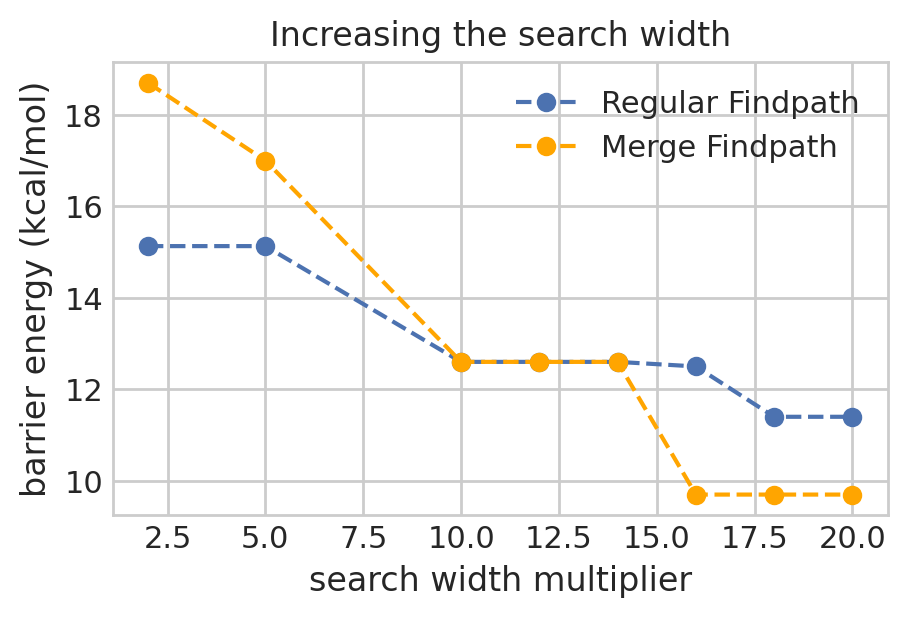

In [12]:
filename = r"sw_scaling_local_min_200_multiple_sections_min10.csv"
prefix = ""
df = pd.read_csv(prefix+filename)

# df = df[df["i"]==23]
df = df[df["i"]==60]


plt.figure(figsize=(5, 3), dpi=200)

plt.plot(df["search_width_multiplier"], df["py_results"], linestyle='--', marker='o', color='b', label="Regular Findpath")
plt.plot(df["search_width_multiplier"], df["new_merge_results"], linestyle='--', marker='o', color='orange', label="Merge Findpath")
plt.title("Increasing the search width")
plt.xlabel("search width multiplier")
plt.ylabel("barrier energy (kcal/mol)")
plt.legend()
# plt.savefig("search_width_scaling_2.png", bbox_inches='tight')

# Convergence of regular Findpath & new merging Findpath

Search Width multiplier: 10x, increased to 100x if no convergence

,i,Unnamed: 0,sequence,s1,s2,search_width_multiplier,bp_dist,py_runtimes,py_results,new_merge_runtimes,new_merge_results
3713,3713,3725,CACAUGGGAAGCAAUGUAGCUCUCUGAUUCAGCUCUGCUACCAAAU...,...((.((((((......))).))).))...........(((.......,.....(((.(((......)))))).......(((((.((((........,100,42,1.0474,11.3,0.0434,11.4
5362,5362,5384,AUGGACCGUCAAGUCUUGGACCGCGGCGCGAUACUACACCAGCUUA...,((((...(.((((((((((((((((((..(((.(((........))...,..(((....(((((((((((.((((((..(((.(((........))...,100,15,0.0028,5.0,0.0031,5.8


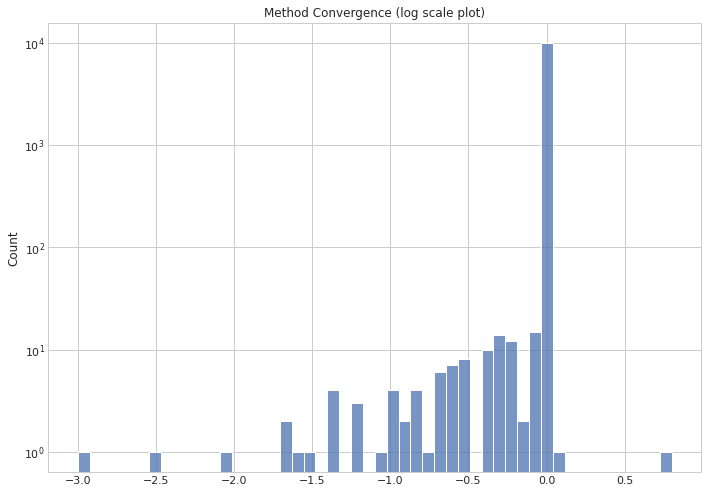

In [13]:
# barrier shift
prefix = ""
filename = "sw_scaling_limit_local_min_100x10000_multiple_sections_min10.csv"
df = pd.read_csv(prefix+filename)

    
filtered_df = df.groupby('i').last().reset_index()
barrier_energy_change = filtered_df["new_merge_results"] - filtered_df["py_results"]
sns.histplot(barrier_energy_change, bins=50)
# plt.ylim(0, 40)
plt.yscale('log',base=10) 
plt.title("Method Convergence (log scale plot)")

# no convergence: new method is worse:
df = filtered_df
df[df["new_merge_results"] > df["py_results"]]

In [24]:
# df[df["i"] == 5362]["sequence"][5362]

In [14]:
# no convergence: new method is better:
df = filtered_df
df[df["new_merge_results"] < df["py_results"]]

,i,Unnamed: 0,sequence,s1,s2,search_width_multiplier,bp_dist,py_runtimes,py_results,new_merge_runtimes,new_merge_results
21,21,21,AAUCCAAUGCAGUCGAGUGAAGUACCGUCGUAGUAGCUAUAACCAC...,........((((((.((((.(((...((.((((..((............,.......(((((.((.(((...))))).....((((..((((.......,10,46,0.1209,9.20,0.0635,9.10
99,99,99,GCGUUCCACUUAGUGGUUUGAUCAGGACUUCUCGCCUAACGGGGUC...,............(.((((((((((((...(((((.....)))))))...,.((.(((.((.....((((((((((((((...........((((.(...,10,58,0.5006,22.06,0.2974,20.03
134,134,134,GAUUCUUAAAUACACUAAGGACAAACUGGACACUUUACGUUUAGAU...,(.((((((.......)))))))...((((.(.((...(..(((......,.........................((((((.......)))))).....,10,51,0.2695,15.50,0.2503,13.80
302,302,302,GUCCAUUUAAGUACGGGCAGCACUGGUCUGCCAUCCCGCCCGUUAU...,((((..........)))).((..((((.(((((((.(((..(.((....,............((((((.....(((....)))....))))))......,10,49,0.1726,20.80,0.1524,19.40
375,375,375,UCCUAUGGCCGAUUUUACACACAAUUUGUGAUAUAUCCAACGCGGG...,.....((((.....(((((.......)))))..(((((......))...,((...((((.(((....((((.....))))....)))...(((((....,10,41,0.1407,13.10,0.0833,12.20
...,...,...,...,...,...,...,...,...,...,...,...
9404,9404,9429,UACCACUGCGUCCAGUCGUUGAGCUGCGUUGCUGGGUCCGGAAGAG...,..((((.(((.((((.(.....)))).).))).((((((.(....(...,..((((.((((..(((......)))))))...((((((((.........,10,41,0.1484,18.50,0.0792,17.50
9423,9423,9448,ACUCUGUGGUGGUAAGGGCUUUUUUGUUACUGGGCUAAGAAAUGCG...,.......(((((...(((((.............((........))....,.....((((.((.(((..............(((((..............,10,46,0.1677,9.10,0.1226,8.80
9637,9637,9663,UGCCUUUGGGGGGAGGGGGCUGGGGGGGAGUAGCCUAAGAGGAGCA...,(((((.(((.((..(((((((...(((......)))......)))....,(((.(((.((((..(((((((....(((.....)))......)))....,10,42,0.1585,10.10,0.0577,9.60
9656,9656,9682,GUUCGGCUAUCGGAGGACAGAGCACUCUUCGUACACCCCGACGUUU...,(((..((((((((((.........))))...........((((((....,....(((.(((((..((.((.((.(((.(((.......))).)......,10,54,0.3970,14.70,0.1531,14.50


# Findpath Microbenchmarks

<AxesSubplot:>

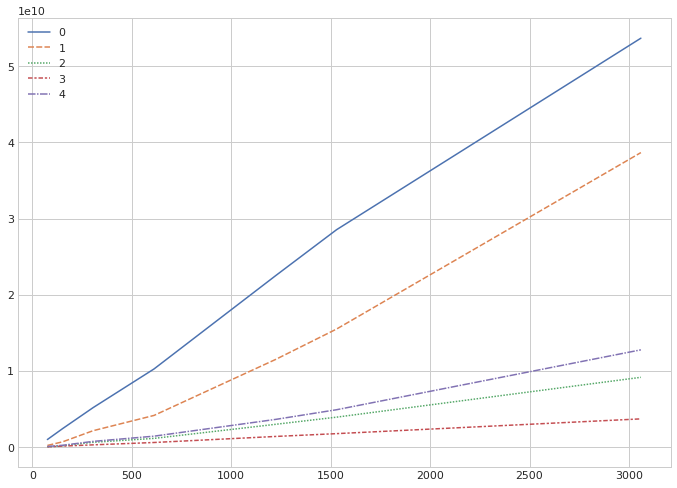

In [18]:
# 200nt

# 600 nt
data = {76:[1007093700, 232414000, 46341800, 53554400, 93505100],
        153:[2449096300, 711627200, 193999600, 146144000, 257612100],
        306:[5196158500, 2168193800, 646515700, 310028200, 764686700],
        612:[10264603200, 4169600500, 1158223300, 619380200, 1448252000],
        1224:[22514064300, 11520954600, 3007293000, 1412978200, 3651927000],
        1530:[28536342000, 15503871100, 3944187100, 1781388500, 4918157300],
        3060:[53662228900, 38652305100, 9170596600, 3718455600, 12774985700]
}

# data = {306:[6251408500, 3070053900, 1635404800],
#         612:[12500360500, 7680777500, 3339331700],
#         918:[18266738800, 13007902500, 4741584100],             
#        }
# data = {306:[6251408500, 3070053900, 1635404800],
#         612:[12500360500, 7680777500, 3339331700],
#         918:[14686839100, 12298807400, 4612155700],
#        }
# [5.9662744998931885, 11.389644622802734, 17.532607316970825, 25.571009159088135]
# [6.644567251205444, 12.736393690109253, 21.209364652633667, 29.574785232543945]

df = pd.DataFrame.from_dict(data)
df
sns.lineplot(data=df.T)

<AxesSubplot:>

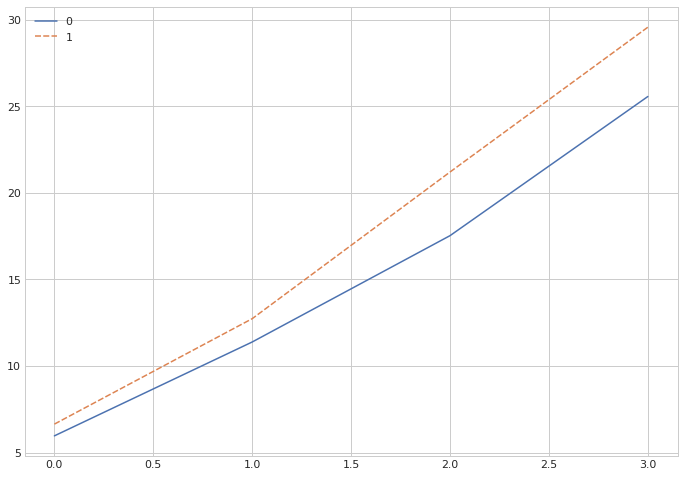

In [209]:
# move_t struct: integers vs short

data = [
[5.9662744998931885, 11.389644622802734, 17.532607316970825, 25.571009159088135],
[6.644567251205444, 12.736393690109253, 21.209364652633667, 29.574785232543945]
]

df = pd.DataFrame.from_dict(data)
df
sns.lineplot(data=df.T)

# Examples...

### updated recursive section scanner

In [21]:
import merge_composition
import merge_recursive

# simple example
sequence = "GAGGUGUAGUCCAGCCCUUAUUUGUUACCCGGCCGAUCCGAGAUAUGCACGUACGUCCAA"
s1 =       "((.(((((....(((........)))..(((.......)).)...))))).).)......"
s2 =       "((((.((......))))))..........(((.....)))...................."

sections = merge_composition.merge_check(sequence, s1, s2, Debug=False)
print (sections)
search_width_multiplier = 2
r = merge_recursive.recursive_merge(sequence, s1, s2, sections, search_width_multiplier=search_width_multiplier,\
    Verbose=True, new=True)

[1, [30, 40], 60]
split ratio: 0.0
Findpath outer section: [1, 60] excluding [[30, 40]] 
GAGGUGUAGUCCAGCCCUUAUUUGUUACCCGGCCGAUCCGAGAUAUGCACGUACGUCCAA
((.(((((....(((........)))..((.........).)...))))).).)...... [   0,    0 ]   2.00
.(.(((((....(((........)))..((.........).)...))))).)........ [  -1,  -54 ]   1.70
.(.(((((....(((........)))...(.........).....))))).)........ [ -29,  -42 ]   1.20
.(.((((.....(((........)))...(.........)......)))).)........ [  -8,  -46 ]   2.20
...((((.....(((........)))...(.........)......)))).......... [  -2,  -52 ]   2.60
...(((......(((........)))...(.........).......))).......... [  -7,  -47 ]   4.30
...((.......(((........)))...(.........)........)).......... [  -6,  -48 ]   7.20
...(........(((........)))...(.........).........).......... [  -5,  -49 ]   8.60
............(((........)))...(.........).................... [  -4,  -50 ]   4.70
.............((........))....(.........).................... [ -13,  -26 ]   5.40
..............(........).....(

In [442]:
# Recursive Merging

# sequence = "UCGUGUAACCCGGGCCCCAUUAUGAAGUCCUUGGCACACGAUAGAUAGCACUGUGCAAGGUGUCCCAUUGACAGGUUUCGCAUAGGUCAG"
# s1 =       "((((((..((.(((.(..........).))).)).))))))......(..((((((.(((((((.....))))..))).))))))..).."
# s2 =       "((((((...((((((..((...))..).)).))).))))))......((.((((((....((((.....))))......))))))))..."

# sections = merge_composition.merge_check(sequence, s1, s2, Debug=False)
# print (sections)
# search_width_multiplier = 2
# r = merge_recursive.recursive_merge(sequence, s1, s2, sections, search_width_multiplier=search_width_multiplier,\
#     Verbose=True, new=True)

# print (r.max_en, "runtimes:",  round(r.runtime,2), round(r.runtime_ext,2), round(r.runtime_merge,2), "s")

# Dataset generation:

- 1000 sequences of lengths 50,100,150,200,300,400,500,600,800,1000
- RNAsubopt --> gradient walk of s1 & s2 to direct local minimum
- filter s1 <-> s2 if minimum basepair distance below 10


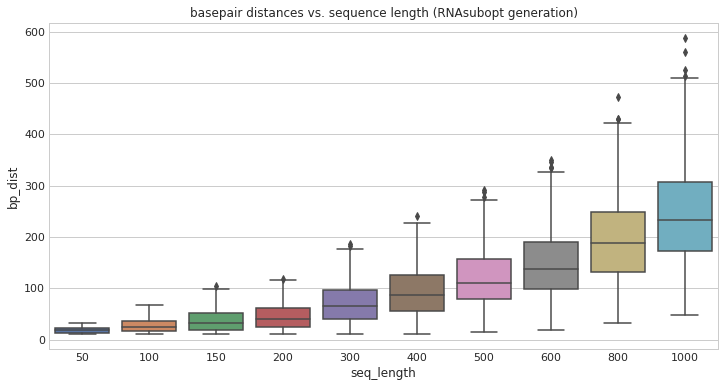

In [25]:
filename = "scanned_sections.csv"

df = pd.read_csv(filename)

sns.set(rc={'figure.figsize':(12,6)})
plt.style.use('seaborn-whitegrid')
plt.title("basepair distances vs. sequence length (RNAsubopt generation)")
sns.boxplot(x="seq_length", y="bp_dist", data=df)
# plt.show()
plt.savefig("bp_dist_distribution.png", dpi=300)

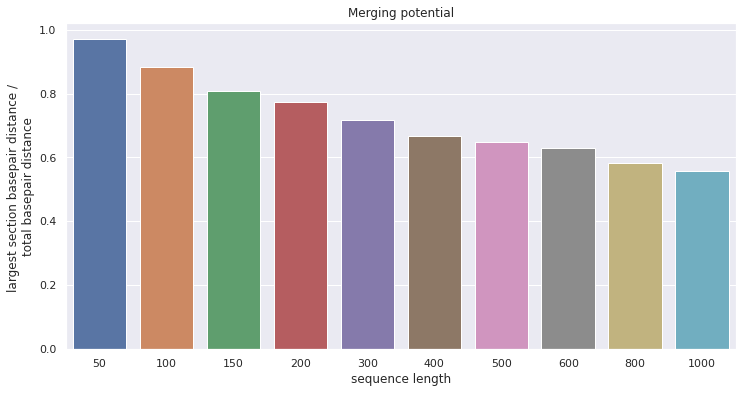

In [37]:
seq_lengths = [50,100,150,200,300,400,500,600,800,1000]

l = []
ls = []

for sl in seq_lengths:   
    l.append(np.sum(df.where(df["seq_length"]==sl)["recursion_depth"]>1)/10)
    ls.append(np.mean(df.where(df["seq_length"]==sl)["largest_section"]/df.where(df["seq_length"]==sl)["bp_dist"]   ))
    
# print (l, ls)
    
# ax = sns.barplot(x=seq_lengths, y=l)
# ax.set(xlabel='sequence length', ylabel='percentage of folding paths where the new approach could work')
# plt.show()

# percentage of the largest section (largest bp_dist / total bp_dist)

sns.set(rc={'figure.figsize':(12,6)})
ax = sns.barplot(x=seq_lengths, y=ls)
ax.set(xlabel='sequence length', ylabel='largest section basepair distance / \ntotal basepair distance')
plt.title("Merging potential")
# plt.show()
plt.savefig("merging_potential.png", dpi=300)

# Indirect Paths

- better neighbour search 
- search width experiments
-- start with low sw, gradually increase sw...
- final search width: not necessarily higher than direct fp

Idea: Find stabilizing structures:
- along the direct path
- common structure (see "mfe" path structure)

In [3]:
import os
os.chdir("../../pathfinder_i")
import pathfinder_i_2
# import merge_composition
os.chdir("../pathfinder/documents/benchmarks")

In [5]:
# rna2dfold example
sequence = "GGGCGCGGUUCGCCCUCCGCUAAAUGCGGAAGAUAAAUUGUGUCU"
s1 = "(((((.....)))))(((((.....)))))(((((.....)))))"
s2 = "((((((((((.....(((((.....))))).....))))))))))"

# sequence = "GGAAGCCGGCGAGGCAGUACCAUUAUAUAGUUUGUCUUCCAAGAAUGGGUACGACCGCGGGACCGUUCGGUUAUCGUCUG"
# s1 = "((.((((((.(((((((.((.........)))))))))))..((((((...((....))...)))))))))).))....."
# s2 = "((.((((((((.((..((((((((....((.....))......))))).)))..)).)).......)))))).))....."

add_moves=[]

section = ()
search_width = 20
Verbose = True
# Debug = True
Debug = False

indirect_iterations = 2

paths = pathfinder_i_2.find_path(sequence, s1, s2, indirect_iterations=indirect_iterations, add_moves=add_moves,
search_width=search_width, Debug=Debug, Verbose=Verbose)

Iteration 0 launching findpath with addtional moves: set()
New best result:  -5.00 kcal/mol | B:  13.10 kcal/mol | E[start]:-18.10 E[end]:-17.70 | additional moves: []
call find_stack for best path
common:
...............(((((.....)))))...............
saddle structure: [0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 30, 29, 28, 27, 26, 0, 0, 0, 0, 0, 20, 19, 18, 17, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
...(.......)...(((((.....)))))...............
s1s2
(((((.....)))))(((((.....)))))(((((.....)))))
((((((((((.....(((((.....))))).....))))))))))
bfs done
Iteration 1 launching findpath with addtional moves: {(6, 12), (3, 14), (2, 15), (7, 11), (5, 13)}
New best result:  -5.80 kcal/mol | B:  12.30 kcal/mol | E[start]:-18.10 E[end]:-17.70 | additional moves: [(6, 12), (7, 11), (5, 13)]
Iteration 1 launching findpath with addtional moves: {(6, 12), (7, 11), (3, 15), (5, 13)}
Iteration 1 launching findpath with addtional moves: {(6, 12), (3, 9), (4, 8), (1, 11), (2, 10), (7, 11),

In [12]:
# 2 alt 1-4
sequence = "GGAAGCCGGCGAGGCAGUACCAUUAUAUAGUUUGUCUUCCAAGAAUGGGUACGACCGCGGGACCGUUCGGUUAUCGUCUG"
s1       = "((.((((((.(((((((.((.........)))))))))))..((((((...((....))...)))))))))).))....."
s2       = "((.((((((((.((..((((((((....((.....))......))))).)))..)).)).......)))))).))....."
s1, s2 = s2, s1

# add_moves = [(10, 65), (11, 64), (14, 58), (15, 57), (49, 63), (50, 62), (48, 64)]
add_moves = []

section = ()
search_width = 64
# search_width = 640
Verbose = True
Debug = False

# indirect_iterations = 1
indirect_iterations = 2

paths = pathfinder_i_2.find_path(sequence, s1, s2, indirect_iterations=indirect_iterations, add_moves=add_moves,
                  search_width=search_width, Debug=Debug, Verbose=Verbose)    

Iteration 0 launching findpath with addtional moves: set()
New best result:  -0.40 kcal/mol | B:  15.90 kcal/mol | E[start]:-16.30 E[end]:-18.40 | additional moves: []
call find_stack for best path
common:
((.((((.............................................................)))).)).....
saddle structure: [0, 75, 74, 0, 72, 71, 70, 69, 68, 67, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 59, 58, 0, 0, 0, 0, 53, 52, 0, 0, 0, 0, 0, 0, 0, 9, 8, 7, 6, 5, 4, 0, 2, 1, 0, 0, 0, 0, 0]
((.((((((...........(.........................)....((....)).......)))))).)).....
s1s2
((.((((((((.((..((((((((....((.....))......))))).)))..)).)).......)))))).)).....
((.((((((.(((((((.((.........)))))))))))..((((((...((....))...)))))))))).)).....
bfs done
Iteration 1 launching findpath with addtional moves: {(17, 55), (23, 48), (18, 54), (8, 64), (14, 58), (9, 63), (26, 45), (24, 47), (25, 46), (15, 57)}
Iteration 1 launching findpa

## Example 3

path.001.007.txt Barriers output
```
..(((((((..((((((......(((((.((((........)))).)))))))))))......))))))) (-18.00) L0007
..(((((((..((((((.......((((.((((........)))).)))).))))))......))))))) (-15.50) I    
..(((((((..((((((........(((.((((........)))).)))..))))))......))))))) (-13.70) I    
..(((((((..((((((.........((.((((........)))).))...))))))......))))))) (-11.70) S    
..(((((((..((((((...((....((.((((........)))).)))).))))))......))))))) (-12.80) I    
..(((((((..(((((((((.....))).((((........))))......))))))......))))))) (-11.10) S    
..(((((((..((((((...((.((....((((........)))))).)).))))))......))))))) (-11.20) I    
..(((((((..((((((...(((((....((((........))))))))).))))))......))))))) (-16.70) L0040
..(((((((..((((((...(((((.....(((........))).))))).))))))......))))))) (-12.90) I    
..(((((((..((((((...(((((......((........))..))))).))))))......))))))) (-11.90) I    
..(((((((..((((((...(((((....................))))).))))))......))))))) (-11.00) S    
..(((((((..((((((...(((((...((......)).......))))).))))))......))))))) (-12.50) I    
..(((((((..((((((...(((((..(((......)))......))))).))))))......))))))) (-16.10) I    
..(((((((..((((((...(((((.((((......)))).....))))).))))))......))))))) (-17.80) I    
..(((((((..((((((...((((..((((......))))......)))).))))))......))))))) (-18.00) L0006
..(((((((..((((((...(((...((((......)))).......))).))))))......))))))) (-17.10) I    
..(((((((..((((((...((....((((......))))........)).))))))......))))))) (-14.00) S    
..(((((((..((((((.........((((......))))...........))))))......))))))) (-15.80) I    
..(((((((..((((((....((...((((......))))....)).....))))))......))))))) (-17.10) I    
..(((((((..((((((...(((...((((......))))....)))....))))))......))))))) (-18.70) L0001
```

In [6]:

sequence = "CGGUUUGUGAGUUCUAGUGUGACGGGCGCCUCCAUUGGCGGGGAGUUGUCUCUGGAGUAUAUGCGCGGAC"
s1 = "..(((((((..((((((......(((((.((((........)))).)))))))))))......)))))))"
s2 = "..(((((((..((((((...(((...((((......))))....)))....))))))......)))))))"


add_moves=[]
section = ()
search_width = 10
Verbose = True
# Debug = True
Debug = False

indirect_iterations = 2

paths = pathfinder_i_2.find_path(sequence, s1, s2, indirect_iterations=indirect_iterations, add_moves=add_moves,
search_width=search_width, Debug=Debug, Verbose=Verbose)

Iteration 0 launching findpath with addtional moves: set()
New best result:  -4.90 kcal/mol | B:  13.10 kcal/mol | E[start]:-18.00 E[end]:-18.70 | additional moves: []
call find_stack for best path
common:
..(((((((..((((((..................................))))))......)))))))
saddle structure: [0, 0, 0, 70, 69, 68, 67, 66, 65, 64, 0, 0, 57, 56, 55, 54, 53, 52, 0, 0, 0, 47, 46, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0, 23, 22, 21, 0, 0, 0, 0, 17, 16, 15, 14, 13, 12, 0, 0, 0, 0, 0, 0, 9, 8, 7, 6, 5, 4, 3]
..(((((((..((((((...(((.........(........)..)))....))))))......)))))))
s1s2
..(((((((..((((((......(((((.((((........)))).)))))))))))......)))))))
..(((((((..((((((...(((...((((......))))....)))....))))))......)))))))
bfs done
Iteration 1 launching findpath with addtional moves: {(27, 43), (22, 49), (32, 38), (23, 48), (21, 50), (33, 37), (29, 41), (24, 47), (25, 46), (30, 40)}
New best result:  -5.80 kcal/mol | B:  12.20 kcal/mol | E[start]:-18.00 E[end]:-18.

In [48]:
sequence = "GGAAGCCGGCGAGGCAGUACCAUUAUAUAGUUUGUCUUCCAAGAAUGGGUACGACCGCGGGACCGUUCGGUUAUCGUCUG"
s1 = "((.((((((((.((..((((((((....((.....))......))))).)))..)).)).......)))))).))....."
s2 = "((.((((((.(((((((.((.........)))))))))))..((((((...((....))...)))))))))).))....."


add_moves=[]
section = ()
search_width = 500
Verbose = True
# Debug = True
Debug = False

indirect_iterations = 1

paths = pathfinder_i_2.find_path(sequence, s1, s2, indirect_iterations=indirect_iterations, add_moves=add_moves,
search_width=search_width, Debug=Debug, Verbose=Verbose)

Iteration 0 launching findpath with addtional moves: set()
New best result:  -0.90 kcal/mol | B:  15.40 kcal/mol | E[start]:-16.30 E[end]:-18.40 | additional moves: []
GGAAGCCGGCGAGGCAGUACCAUUAUAUAGUUUGUCUUCCAAGAAUGGGUACGACCGCGGGACCGUUCGGUUAUCGUCUG
((.((((((((.((..((((((((....((.....))......))))).)))..)).)).......)))))).))..... [   0,    0 ] -16.30
((.(((((((..((..((((((((....((.....))......))))).)))..))..).......)))))).))..... [ -11,  -58 ] -13.20
((.((((((...((..((((((((....((.....))......))))).)))..))..........)))))).))..... [ -10,  -59 ] -13.40
((.((((((....(..((((((((....((.....))......))))).)))..)...........)))))).))..... [ -13,  -56 ]  -9.00
((.((((((.......((((((((....((.....))......))))).)))..............)))))).))..... [ -14,  -55 ]  -9.20
((.((((((.......((.(((((....((.....))......)))))..))..............)))))).))..... [ -19,  -50 ]  -7.60
((.((((((.......(..(((((....((.....))......)))))...)..............)))))).))..... [ -18,  -51 ]  -5.90
((.((((((..........(((((....((.....))

# Suboptimal paths required...



In [441]:
sequence = "UGAAGACCCAUUGAGUAACGACACCGCACGGCGCAUGGCGUCAGAGUAGCACUGCCUCGU"
s1 =       "..........(.(.(...((....)).....).))........................."
s2 =       "..........(...((..((........))..)))........................."

print ()
print ("Findpath inner section: [11, 35]")
moves = [(0, 0), (-15, -32), (-13, -34), (-20, -25), (-19, -26), (19, 30), (20, 29), (15, 34), (16, 33)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[94m")


print ()
print ("Findpath inner section: [11, 35]")
moves = [(0, 0), (-15, -32), (-20, -25), (-19, -26), (19, 30), (20, 29), (-13, -34), (15, 34), (16, 33)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[94m")


s1 =       "....(((((((.......................)))).)))((.((......))))..."
s2 =       "....(((((((.......................)))).))).(((..((...))))).."

print ()
print ("Findpath outer section: [1, 60] excluding [[11, 35]] ")
moves = [(0, 0), (-43, -57), (-44, -56), (-47, -54), (-46, -55), (49, 55), (50, 54), (44, 58), (45, 57), (46, 56)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[92m")


print ()
print ("Findpath outer section: [1, 60] excluding [[11, 35]] ")
moves = [(0, 0), (-43, -57), (-44, -56), (44, 58), (45, 57), (-47, -54), (-46, -55), (46, 56), (49, 55,), (50, 54)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[92m")

s1 =       "....(((((((.(.(...((....)).....).))))).)))((.((......))))..."
s2 =       "....(((((((...((..((........))..)))))).))).(((..((...))))).."

print ()
print ("Merging results: Inner section [[11, 35]] + outer section [1, 60]")
moves = [(0, 0), (-15, -32), (-13, -34), (-43, -57), (-44, -56), (-47, -54), (-46, -55), (-20, -25), (-19, -26), (19, 30), (20, 29), (15, 34), (16, 33), (49, 55), (50, 54), (44, 58), (45, 57), (46, 56)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[96m")

print ()
print ("Merging results: Inner section [[11, 35]] + outer section [1, 60]")
moves = [(0, 0), (-15, -32), (-20, -25), (-19, -26), (19, 30), (20, 29), (-43, -57), (-44, -56), (44, 58), (45, 57), (-47, -54), (-46, -55), (46, 56), (49, 55,), (50, 54), (-13, -34), (15, 34), (16, 33)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[91m")




Findpath inner section: [11, 35]
UGAAGACCCAUUGAGUAACGACACCGCACGGCGCAUGGCGUCAGAGUAGCACUGCCUCGU
..........(.(.(...((....)).....).))......................... [   0,    0 ]   6.70
..........(.(.....((....)).......))......................... [ -15,  -32 ]   6.40
..........(.......((....))........)......................... [ -13,  -34 ]   5.80
..........(.......(......)........)......................... [ -20,  -25 ]   8.00
..........(.......................)......................... [ -19,  -26 ]   7.20
..........(.......(..........)....)......................... [  19,   30 ]   9.00
..........(.......((........))....)......................... [  20,   29 ]   6.00
..........(...(...((........))...))......................... [  15,   34 ]   6.60
..........(...((..((........))..)))......................... [  16,   33 ]   3.20
S:   9.00 kcal/mol | B:   2.30 kcal/mol | E[start]:  6.70 E[end]:  3.20

Findpath inner section: [11, 35]
UGAAGACCCAUUGAGUAACGACACCGCACGGCGCAUGGCGUCAGAGUAGCACUGCCUCGU


-2.5

<AxesSubplot:>

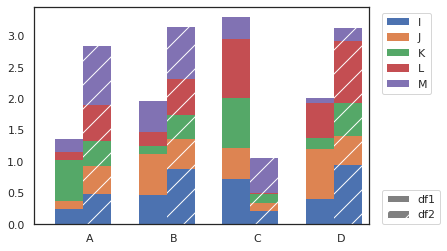

In [6]:
# https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas

def plot_clustered_stacked(dfall, labels=None, title="",  H="/", **kwargs):
    """
    Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
    labels is a list of the names of the dataframe, used for the legend
    title is a string for the title of the plot
    H is the hatch used for identification of the different dataframe
    """

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.04, 0.6])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.04, 0.0]) 
    axe.add_artist(l1)
    return axe

# create fake dataframes
df1 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df2 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
# df3 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"], 
#                    columns=["I", "J", "K", "L", "M"])

# exmample call
plot_clustered_stacked([df1, df2],["df1", "df2"])    